<a href="https://colab.research.google.com/github/anjalikankoriya/LGMVIP--DATA-SCIENCE/blob/main/TASK-03/terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task3: Exploratory Data Analysis on Dataset- Terrorism**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN


In [28]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [29]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attack','targtype1_txt':'Target','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)

In [30]:
data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"Attack",'Kill',
               'Wound','target1','Summary','Group','Target','Weapon','motive']]

In [31]:
data.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack,Kill,Wound,target1,Summary,Group,Target,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [32]:
data.shape

(45964, 18)

In [33]:
data.isnull().sum() 

Year             0
Month            0
Day              0
Country          0
State          181
Region           0
City             0
Latitude      2485
Longitude     2485
Attack           0
Kill          5706
Wound         7534
target1        382
Summary      44743
Group            1
Target           0
Weapon           1
motive       45023
dtype: int64

In [34]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [35]:
data['Casualities'] = data['Kill'] + data['Wound']

In [36]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45964 entries, 0 to 45963
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         45964 non-null  int64  
 1   Month        45964 non-null  int64  
 2   Day          45964 non-null  int64  
 3   Country      45964 non-null  object 
 4   State        45783 non-null  object 
 5   Region       45964 non-null  object 
 6   City         45964 non-null  object 
 7   Latitude     43479 non-null  float64
 8   Longitude    43479 non-null  float64
 9   Attack       45964 non-null  object 
 10  Kill         45964 non-null  float64
 11  Wound        45964 non-null  float64
 12  target1      45582 non-null  object 
 13  Summary      1221 non-null   object 
 14  Group        45963 non-null  object 
 15  Target       45964 non-null  object 
 16  Weapon       45963 non-null  object 
 17  motive       941 non-null    object 
 18  Casualities  45964 non-null  float64
dtypes: f

In [37]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualities
count,45964.000000,45964.000000,45964.000000,43479.000000,4.347900e+04,45964.000000,45964.000000,45964.000000
mean,1983.561787,6.313528,15.331477,16.909789,-2.005662e+03,1.821621,1.408341,3.229963
std,5.065228,3.408719,8.836873,25.246486,4.133294e+05,8.025578,9.386752,13.578707
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1980.000000,3.000000,8.000000,4.667128,-7.697846e+01,0.000000,0.000000,0.000000
50%,1984.000000,6.000000,15.000000,14.152916,-1.543001e+01,0.000000,0.000000,0.000000
75%,1988.000000,9.000000,23.000000,38.908642,2.787027e+01,1.000000,0.000000,2.000000
max,1991.000000,12.000000,31.000000,64.837778,1.784419e+02,422.000000,751.000000,760.000000


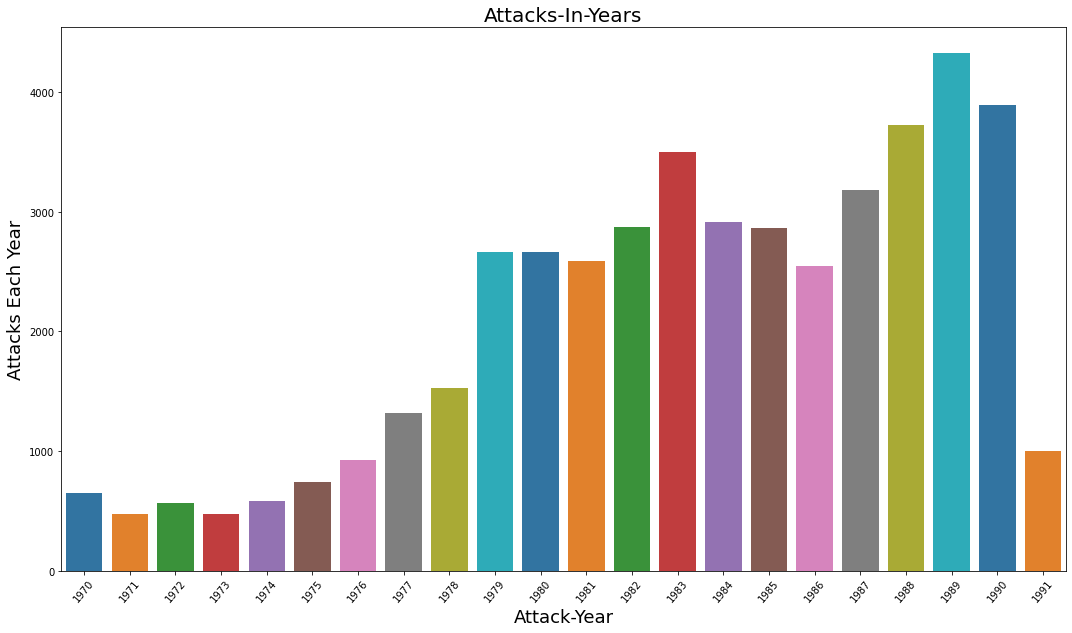

In [38]:
year =data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attack-Year',fontsize=18)
plt.ylabel('Attacks Each Year',fontsize=18)
plt.title('Attacks-In-Years',fontsize=20)
plt.show()

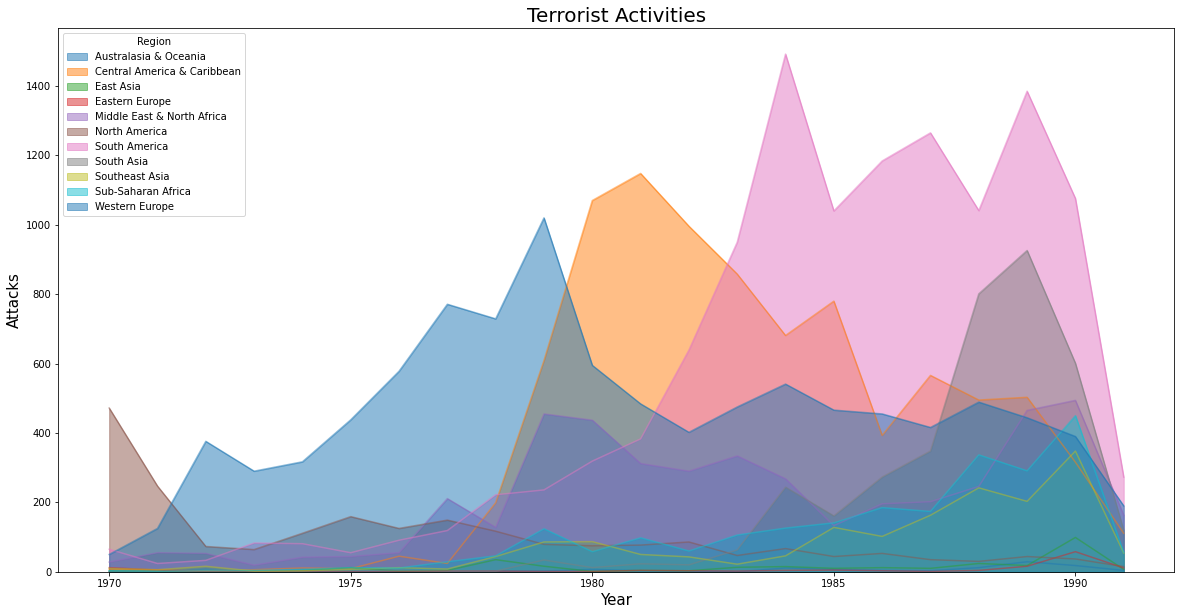

In [40]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities',fontsize=20)
plt.ylabel('Attacks',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

In [42]:
attack = data.Country.value_counts()[:11]
attack

El Salvador       4829
Peru              4785
Colombia          3882
United Kingdom    3148
Spain             2375
United States     2038
Chile             2010
Nicaragua         1787
Guatemala         1712
India             1648
Sri Lanka         1500
Name: Country, dtype: int64

In [43]:
data.Group.value_counts()[1:11]

Shining Path (SL)                                   3639
Farabundo Marti National Liberation Front (FMLN)    2926
Irish Republican Army (IRA)                         2103
Basque Fatherland and Freedom (ETA)                 1495
Nicaraguan Democratic Force (FDN)                    895
New People's Army (NPA)                              818
Manuel Rodriguez Patriotic Front (FPMR)              792
Palestinians                                         765
Revolutionary Armed Forces of Colombia (FARC)        738
National Liberation Army of Colombia (ELN)           673
Name: Group, dtype: int64

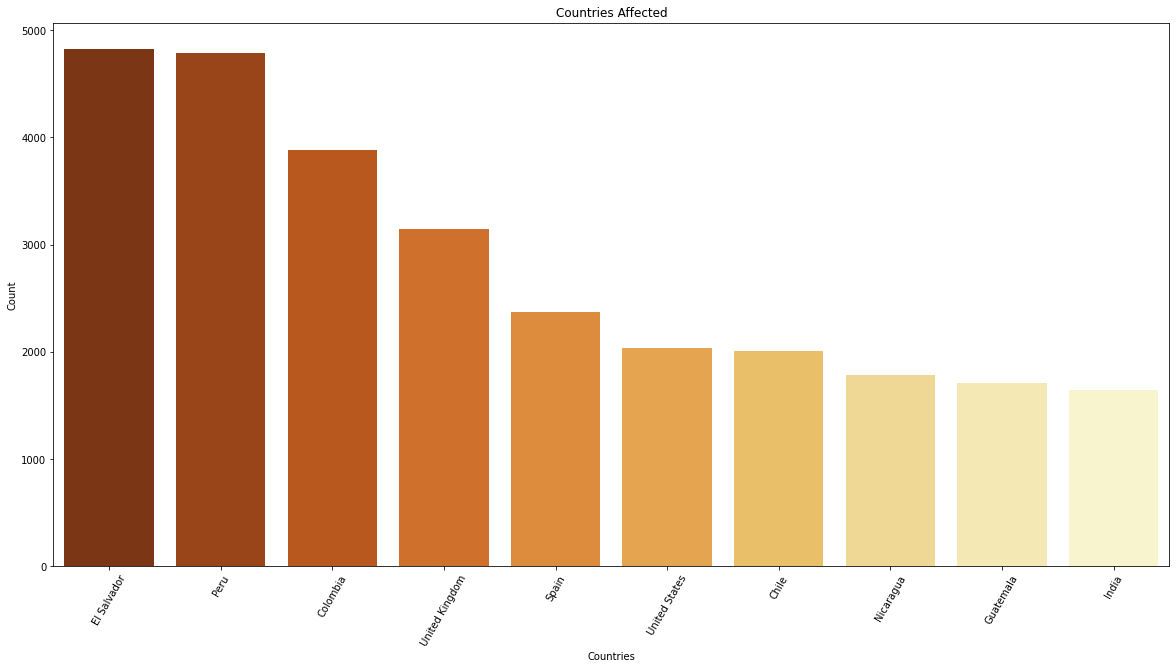

In [44]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.show()

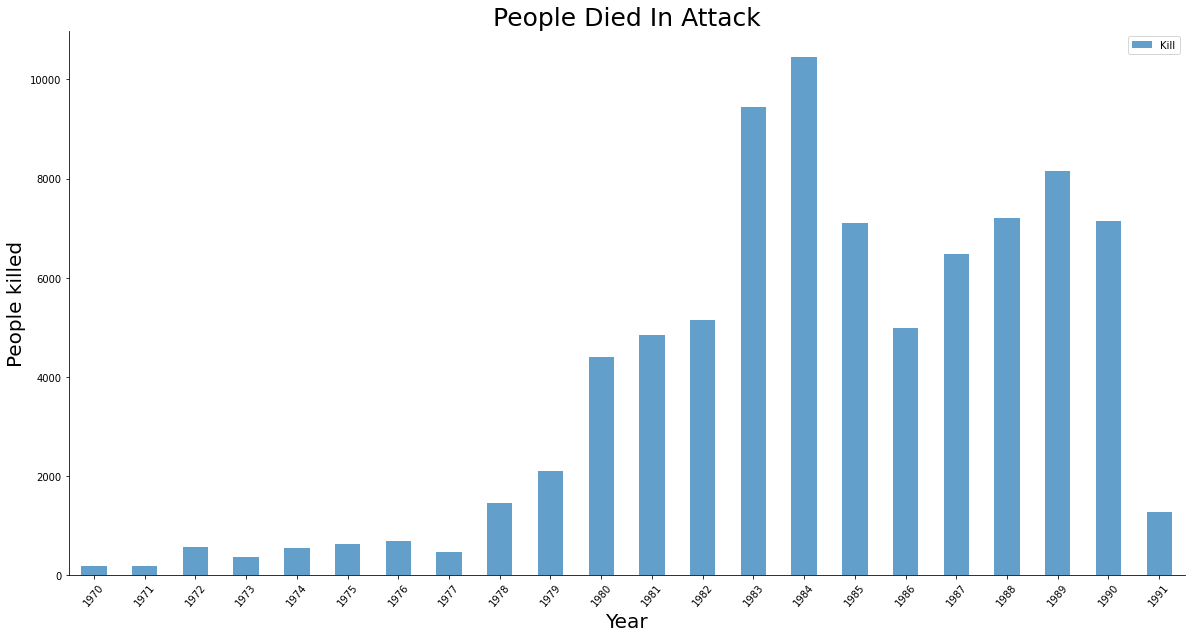

In [65]:
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died In Attack",fontsize=25)
plt.ylabel("People killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

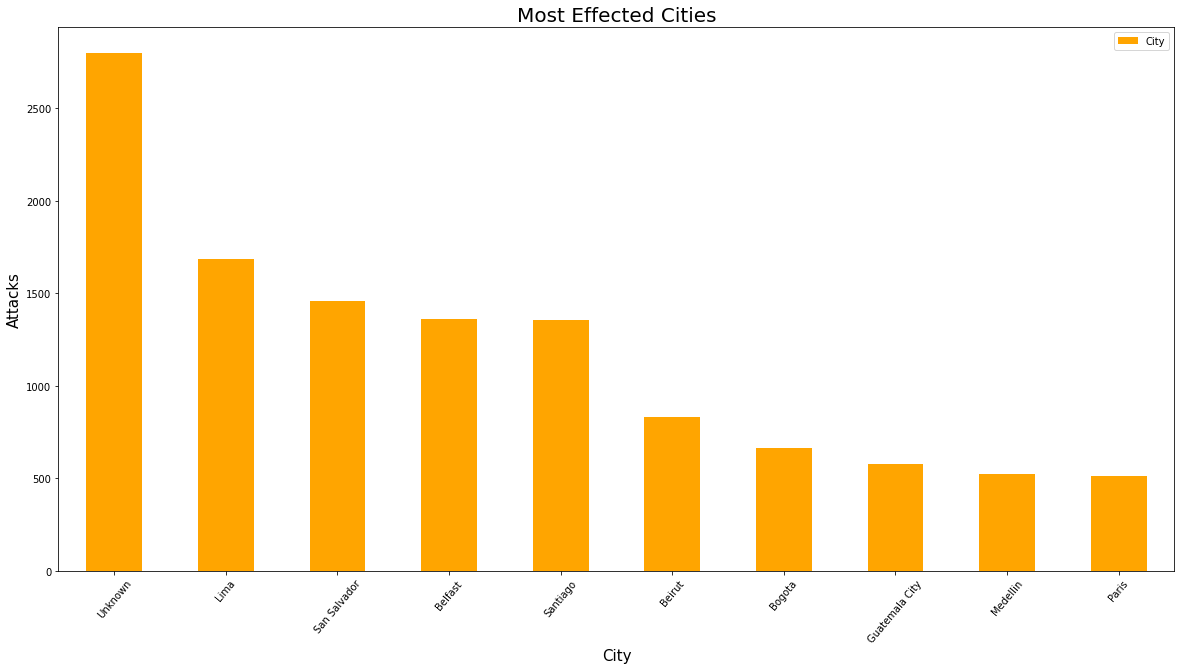

In [64]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='orange')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Attacks",fontsize=15)
plt.title("Most Effected Cities",fontsize=20)
plt.show()

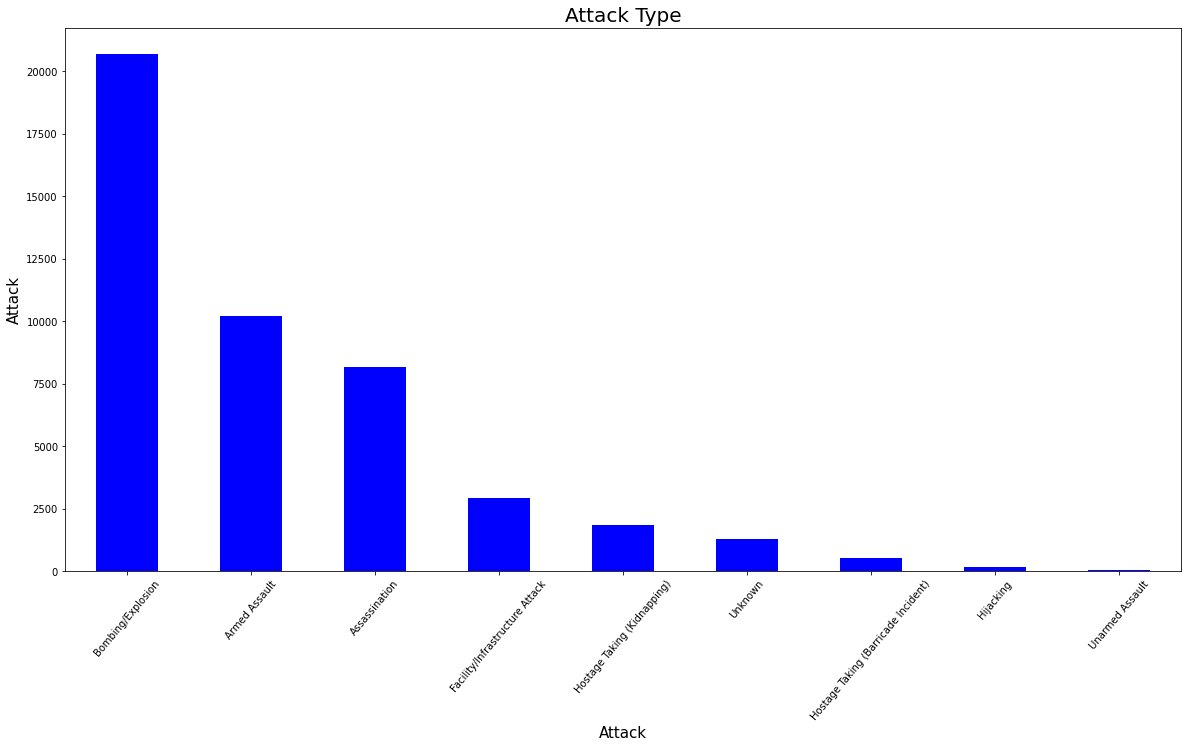

In [63]:
data['Attack'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("Attack",fontsize=15)
plt.ylabel("Attack",fontsize=15)
plt.title("Attack Type",fontsize=20)
plt.show()

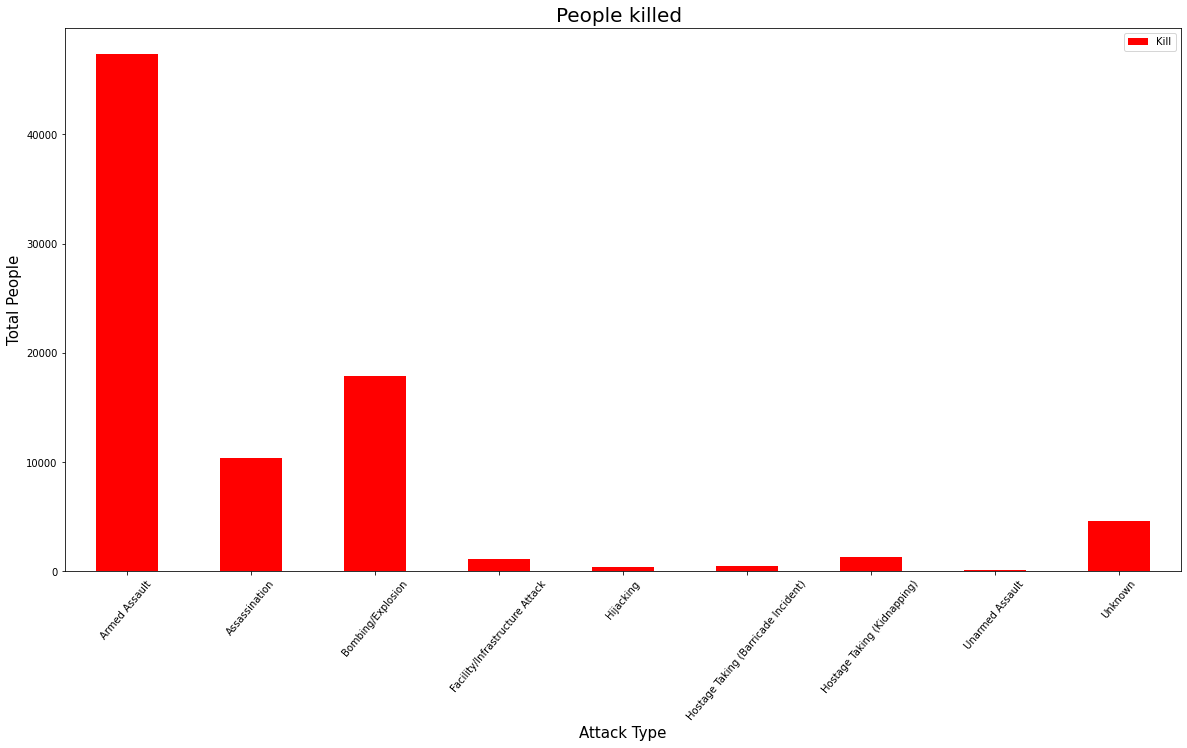

In [62]:
data[['Attack','Kill']].groupby(["Attack"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['red'])
plt.xticks(rotation=50)
plt.title("People killed ",fontsize=20)
plt.ylabel('Total People',fontsize=15)
plt.xlabel('Attack Type',fontsize=15)
plt.show()

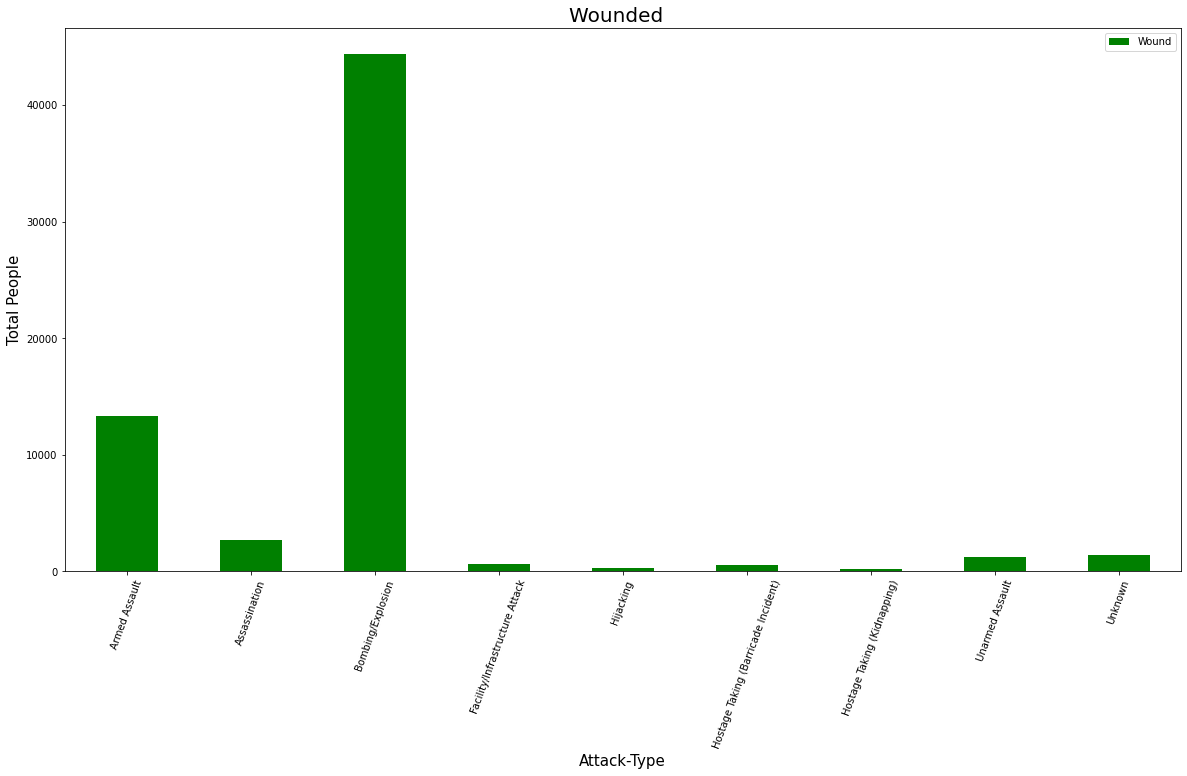

In [61]:
data[['Attack','Wound']].groupby(["Attack"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['green'])
plt.xticks(rotation=70)
plt.title("Wounded  ",fontsize=20)
plt.ylabel('Total People',fontsize=15)
plt.xlabel('Attack-Type',fontsize=15)
plt.show()

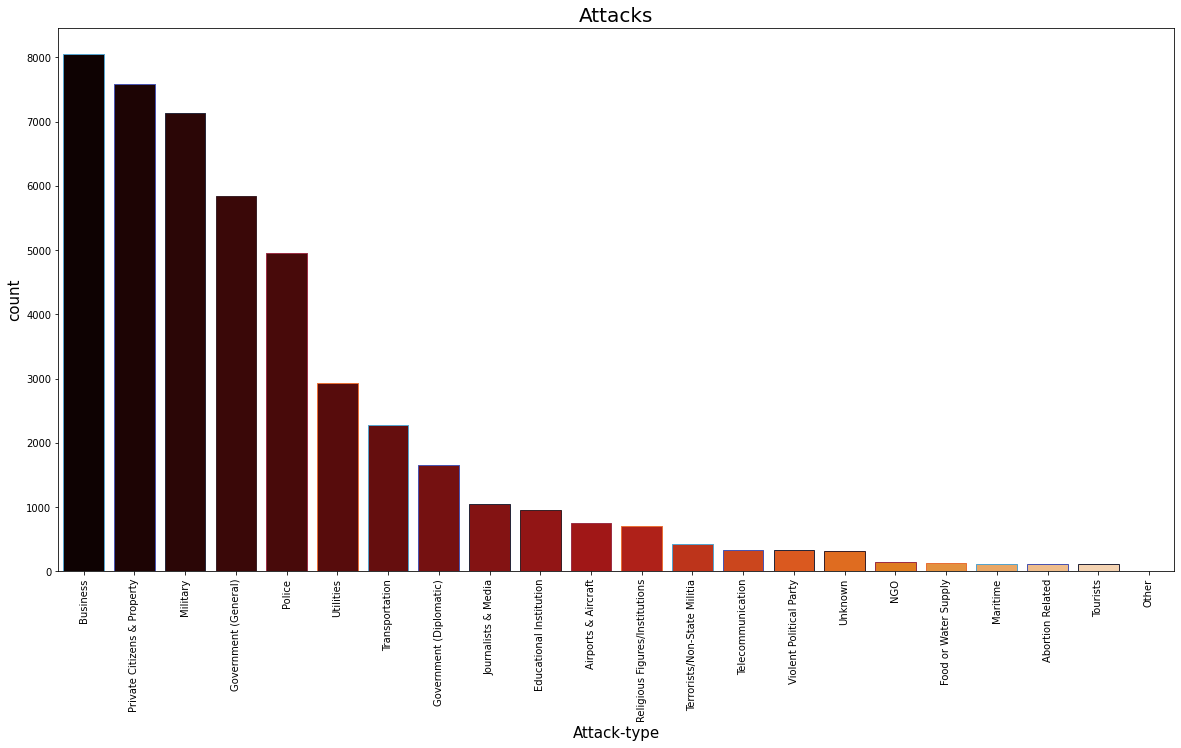

In [53]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Target"],order=data['Target'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("icefire"));
plt.xticks(rotation=90)
plt.xlabel("Attack-type",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attacks",fontsize=20)
plt.show()

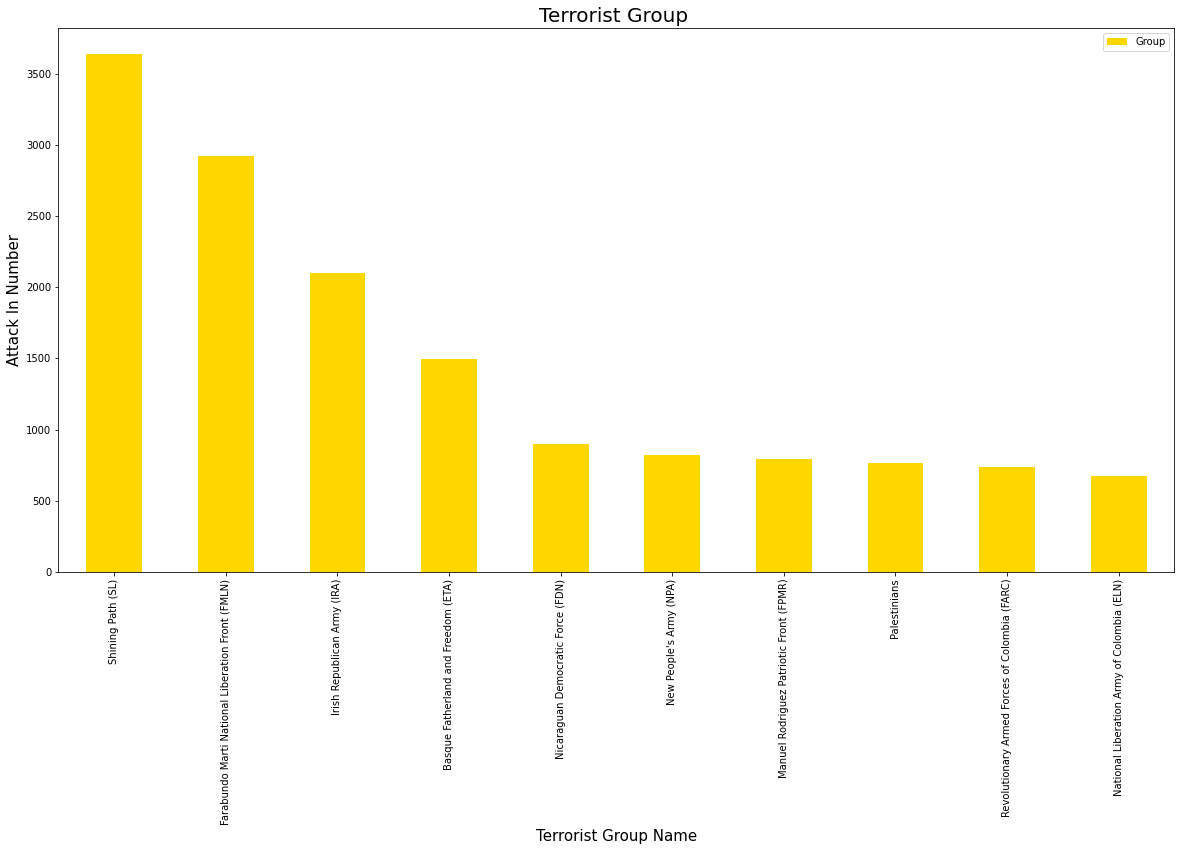

In [60]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='gold',figsize=(20,10))
plt.title("Terrorist Group ",fontsize=20)
plt.xlabel("Terrorist Group Name",fontsize=15)
plt.ylabel("Attack In Number",fontsize=15)
plt.show()

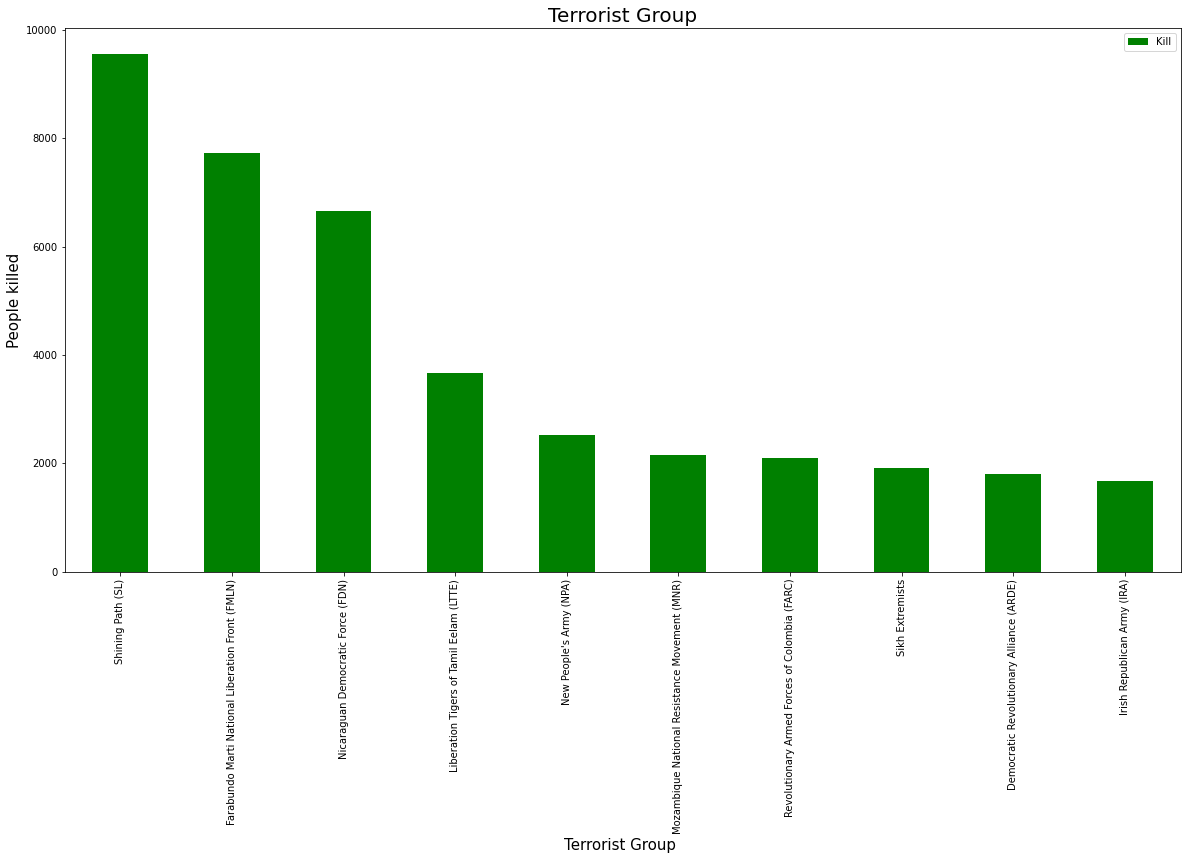

In [59]:
data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Terrorist Group",fontsize=20)
plt.xlabel("Terrorist Group ",fontsize=15)
plt.ylabel("People killed",fontsize=15)
plt.show()

In [58]:
dataframe=data[['Group','Country','Kill']]
dataframe=dataframe.groupby(['Group','Country'],axis=0).sum().sort_values('Kill',ascending=False).drop('Unknown').reset_index().head(10)
dataframe

,Group,Country,Kill
0,Shining Path (SL),Peru,9558.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,7690.0
2,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,3652.0
4,New People's Army (NPA),Philippines,2517.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,2087.0
6,Mozambique National Resistance Movement (MNR),Mozambique,2074.0
7,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0
8,Irish Republican Army (IRA),United Kingdom,1614.0
9,Sikh Extremists,India,1575.0


In [67]:
Kill = data.loc[:,'Kill']
print('People Killed By Terror Attack:', int(sum(Kill.dropna())))

People Killed By Terror Attack: 83729


In [68]:
typeKill = data.pivot_table(columns='Attack', values='Kill', aggfunc='sum')
typeKill

Attack,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,47380.0,10411.0,17850.0,1166.0,427.0,496.0,1336.0,89.0,4574.0


In [69]:
countryKill = data.pivot_table(columns='Country', values='Kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,219.0,0.0,5.0,0.0,1005.0,366.0,7.0,21.0,0.0,0.0,...,0.0,117.0,226.0,97.0,1.0,0.0,6.0,31.0,69.0,136.0
